# Ejercicio 2. Modelos de Clasificación

In [45]:
# utilidades_generales
import numpy as np
import pandas as pd
import time, joblib, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, classification_report
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb


X = df_train_full.drop('isFraud', axis=1)
y = df_train_full['isFraud']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
pos, neg = y_train.sum(), len(y_train) - y_train.sum()
escala = neg / pos


In [68]:
resultados = pd.DataFrame(columns=['modelo','precision','recall','f1','auc'])

In [69]:
# # knn_entrenamiento
# inicio = time.time()
# pipe_knn = Pipeline([('scaler', StandardScaler()), ('modelo', KNeighborsClassifier())])
# esp_knn = {'modelo__n_neighbors': Integer(3, 15), 'modelo__weights': Categorical(['uniform', 'distance'])}
# bay_knn = BayesSearchCV(pipe_knn, esp_knn, scoring='roc_auc', n_jobs=-1, cv=cv, n_iter=5, random_state=42)
# print('Entrenando KNN')
# bay_knn.fit(X_train, y_train)
# print('Mejor AUC validación:', bay_knn.best_score_)
# print('Tiempo:', time.time() - inicio)
# joblib.dump(bay_knn.best_estimator_, 'drive/MyDrive/knn.pkl')


Entrenando KNN

Mejor AUC validación: 0.8352891784145362

Tiempo: 2691.609223842621

['knn.pkl']

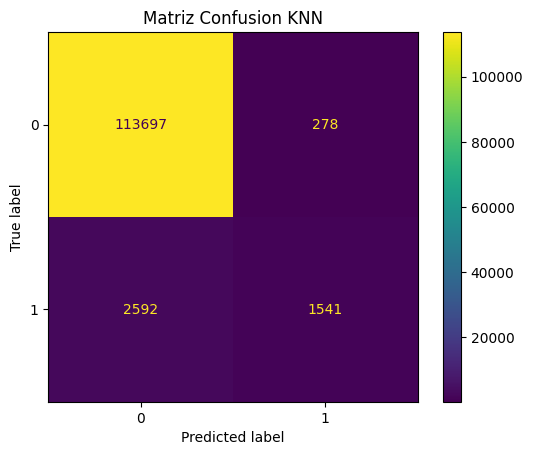

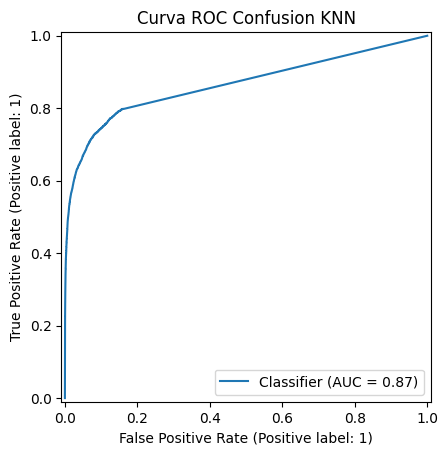

,modelo,precision,recall,f1,auc
0,KNN,0.847169,0.372853,0.517809,0.865627


In [70]:
# knn_metricas
modelo_knn = joblib.load('drive/MyDrive/knn.pkl')
pro_knn = modelo_knn.predict_proba(X_val)[:, 1]
pr_knn = (pro_knn >= 0.5).astype(int)
cm_knn = confusion_matrix(y_val, pr_knn)
ConfusionMatrixDisplay(cm_knn).plot()
plt.title("Matriz Confusion KNN")
plt.show()

RocCurveDisplay.from_predictions(y_val, pro_knn)
plt.title("Curva ROC Confusion KNN")
plt.show()
res = ['KNN', precision_score(y_val, pr_knn), recall_score(y_val, pr_knn), f1_score(y_val, pr_knn), roc_auc_score(y_val, pro_knn)]
resultados.loc[len(resultados)] = res;

resultados


In [88]:
print(classification_report(y_val, pr_knn))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113975
           1       0.85      0.37      0.52      4133

    accuracy                           0.98    118108
   macro avg       0.91      0.69      0.75    118108
weighted avg       0.97      0.98      0.97    118108



In [71]:
# # logreg_entrenamiento
# inicio = time.time()
# pipe_log = Pipeline([('scaler', StandardScaler()), ('modelo', LogisticRegression(max_iter=50, n_jobs=-1, class_weight='balanced', solver='saga'))])
# esp_log = {'modelo__C': Real(1e-4, 10, prior='log-uniform'), 'modelo__penalty': Categorical(['l1', 'l2'])}
# bay_log = BayesSearchCV(pipe_log, esp_log, scoring='roc_auc', n_jobs=-1, cv=cv, n_iter=5, random_state=42)
# print('Entrenando LogisticRegression')
# bay_log.fit(X_train, y_train)
# print('Mejor AUC validación:', bay_log.best_score_)
# print('Tiempo:', time.time() - inicio)
# joblib.dump(bay_log.best_estimator_, 'drive/MyDrive/logreg.pkl')


Entrenando LogisticRegression

Mejor AUC validación: 0.813247300207955

Tiempo: 200.45954012870789

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348:

ConvergenceWarning: The max_iter was reached which means the coef_ did not

converge
  warnings.warn(
['logreg.pkl']

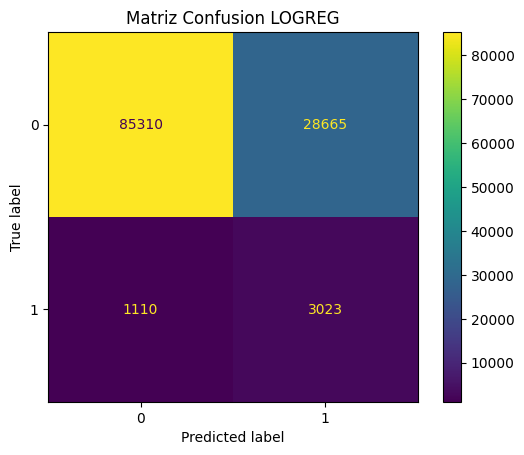

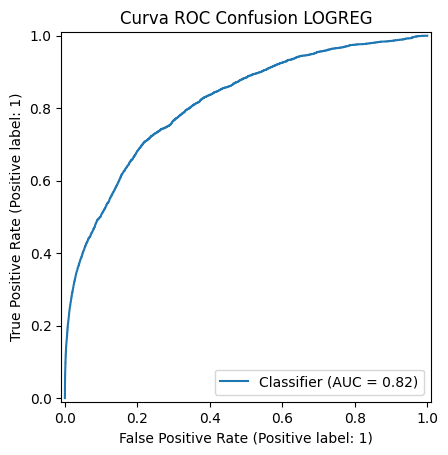

,modelo,precision,recall,f1,auc
0,KNN,0.847169,0.372853,0.517809,0.865627
1,Logistic Regression,0.095399,0.731430,0.168784,0.815279


In [72]:
# logreg_metricas
modelo_log = joblib.load('drive/MyDrive/logreg.pkl')
pro_log = modelo_log.predict_proba(X_val)[:, 1]
pr_log = (pro_log >= 0.5).astype(int)
cm_log = confusion_matrix(y_val, pr_log)
ConfusionMatrixDisplay(cm_log).plot()
plt.title("Matriz Confusion LOGREG")
plt.show()
RocCurveDisplay.from_predictions(y_val, pro_log)

plt.title("Curva ROC Confusion LOGREG")
plt.show()
res = ['Logistic Regression', precision_score(y_val, pr_log), recall_score(y_val, pr_log), f1_score(y_val, pr_log), roc_auc_score(y_val, pro_log)]
resultados.loc[len(resultados)] = res;

resultados


In [89]:
print(classification_report(y_val, pr_log))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85    113975
           1       0.10      0.73      0.17      4133

    accuracy                           0.75    118108
   macro avg       0.54      0.74      0.51    118108
weighted avg       0.96      0.75      0.83    118108



In [73]:
# # bayesiano_entrenamiento
# inicio = time.time()
# pipe_nb = Pipeline([('modelo', GaussianNB())])
# esp_nb = {'modelo__var_smoothing': Real(1e-11, 1e-7, prior='log-uniform')}
# bay_nb = BayesSearchCV(pipe_nb, esp_nb, scoring='roc_auc', n_jobs=-1, cv=cv, n_iter=5, random_state=42)
# print('Entrenando GaussianNB')
# bay_nb.fit(X_train, y_train)
# print('Mejor AUC validación:', bay_nb.best_score_)
# print('Tiempo:', time.time() - inicio)
# joblib.dump(bay_nb.best_estimator_, 'drive/MyDrive/bayes.pkl')


Entrenando GaussianNB

Mejor AUC validación: 0.6643348881431288

Tiempo: 7.417926073074341

['bayes.pkl']

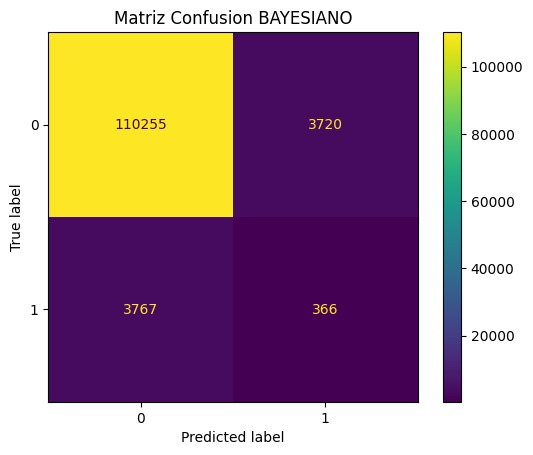

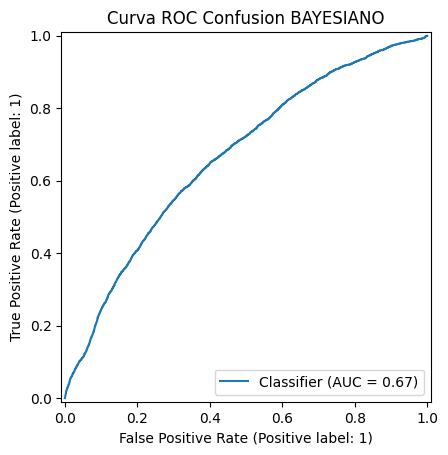

,modelo,precision,recall,f1,auc
0,KNN,0.847169,0.372853,0.517809,0.865627
1,Logistic Regression,0.095399,0.731430,0.168784,0.815279
2,Bayesian Classification,0.089574,0.088556,0.089062,0.666605


In [74]:
# bayesiano_metricas
modelo_nb = joblib.load('drive/MyDrive/bayes.pkl')
pro_nb = modelo_nb.predict_proba(X_val)[:, 1]
pr_nb = (pro_nb >= 0.5).astype(int)
cm_nb = confusion_matrix(y_val, pr_nb)
ConfusionMatrixDisplay(cm_nb).plot()
plt.title("Matriz Confusion BAYESIANO")
plt.show()

RocCurveDisplay.from_predictions(y_val, pro_nb)
plt.title("Curva ROC Confusion BAYESIANO")
plt.show()
res = ['Bayesian Classification', precision_score(y_val, pr_nb), recall_score(y_val, pr_nb), f1_score(y_val, pr_nb), roc_auc_score(y_val, pro_nb)]
resultados.loc[len(resultados)] = res;

resultados

In [90]:
print(classification_report(y_val, pr_nb))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97    113975
           1       0.09      0.09      0.09      4133

    accuracy                           0.94    118108
   macro avg       0.53      0.53      0.53    118108
weighted avg       0.94      0.94      0.94    118108



In [75]:
# # arbol_entrenamiento
# inicio = time.time()
# pipe_dt = Pipeline([('modelo', DecisionTreeClassifier(class_weight='balanced'))])
# esp_dt = {'modelo__max_depth': Integer(3, 20), 'modelo__min_samples_split': Integer(2, 20), 'modelo__criterion': Categorical(['gini', 'entropy'])}
# bay_dt = BayesSearchCV(pipe_dt, esp_dt, scoring='roc_auc', n_jobs=-1, cv=cv, n_iter=5, random_state=42)
# print('Entrenando DecisionTree')
# bay_dt.fit(X_train, y_train)
# print('Mejor AUC validación:', bay_dt.best_score_)
# print('Tiempo:', time.time() - inicio)
# joblib.dump(bay_dt.best_estimator_, 'drive/MyDrive/arbol.pkl')


Entrenando DecisionTree

Mejor AUC validación: 0.8408365717032249

Tiempo: 36.64292669296265

['arbol.pkl']

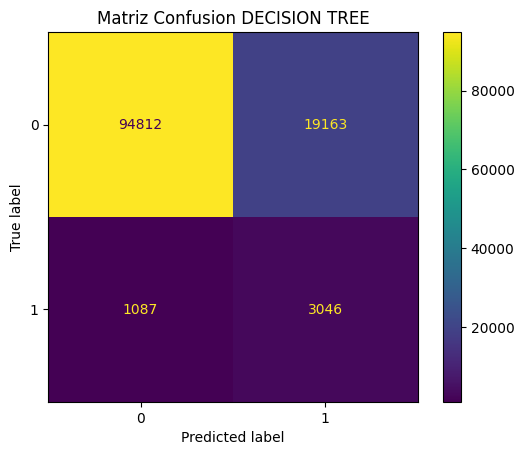

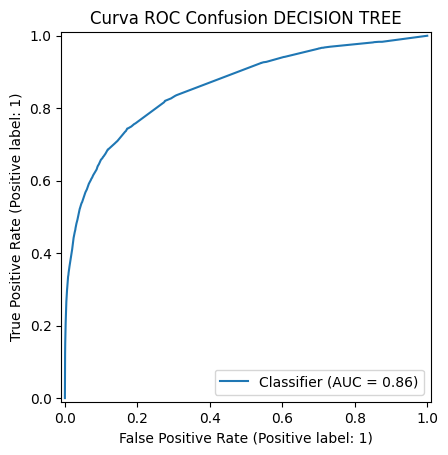

,modelo,precision,recall,f1,auc
0,KNN,0.847169,0.372853,0.517809,0.865627
1,Logistic Regression,0.095399,0.731430,0.168784,0.815279
2,Bayesian Classification,0.089574,0.088556,0.089062,0.666605
3,Decision Tree,0.137152,0.736995,0.231266,0.859555


In [76]:
# arbol_metricas
modelo_dt = joblib.load('drive/MyDrive/arbol.pkl')
pro_dt = modelo_dt.predict_proba(X_val)[:, 1]
pr_dt = (pro_dt >= 0.5).astype(int)
cm_dt = confusion_matrix(y_val, pr_dt)
ConfusionMatrixDisplay(cm_dt).plot()

plt.title("Matriz Confusion DECISION TREE")
plt.show()

RocCurveDisplay.from_predictions(y_val, pro_dt)
plt.title("Curva ROC Confusion DECISION TREE")
plt.show()

res = ['Decision Tree', precision_score(y_val, pr_dt), recall_score(y_val, pr_dt), f1_score(y_val, pr_dt), roc_auc_score(y_val, pro_dt)]
resultados.loc[len(resultados)] = res

resultados


In [91]:
print(classification_report(y_val, pr_dt))


              precision    recall  f1-score   support

           0       0.99      0.83      0.90    113975
           1       0.14      0.74      0.23      4133

    accuracy                           0.83    118108
   macro avg       0.56      0.78      0.57    118108
weighted avg       0.96      0.83      0.88    118108



In [77]:
# # rf_entrenamiento
# inicio = time.time()
# pipe_rf = Pipeline([('modelo', RandomForestClassifier(class_weight='balanced', n_jobs=-1))])
# esp_rf = {'modelo__n_estimators': Integer(100, 300), 'modelo__max_depth': Integer(5, 20), 'modelo__max_features': Categorical(['sqrt', 'log2'])}
# bay_rf = BayesSearchCV(pipe_rf, esp_rf, scoring='roc_auc', n_jobs=-1, cv=cv, n_iter=5, random_state=42)
# print('Entrenando RandomForest')
# bay_rf.fit(X_train, y_train)
# print('Mejor AUC validación:', bay_rf.best_score_)
# print('Tiempo:', time.time() - inicio)
# joblib.dump(bay_rf.best_estimator_, 'drive/MyDrive/rf.pkl')


Entrenando RandomForest

Mejor AUC validación: 0.901874053800999

Tiempo: 220.5481595993042

['rf.pkl']

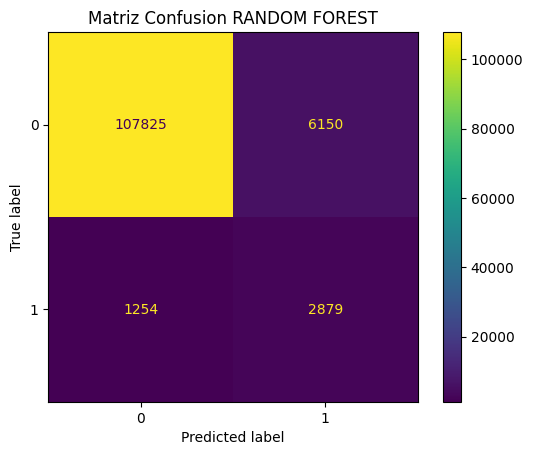

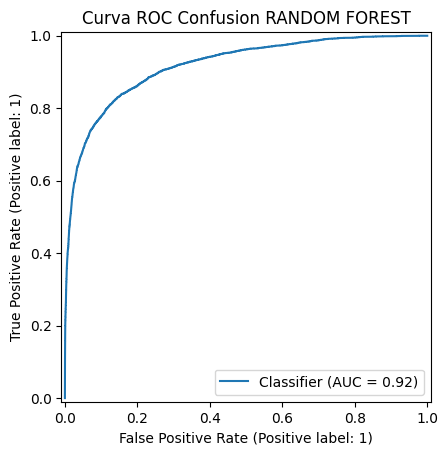

,modelo,precision,recall,f1,auc
0,KNN,0.847169,0.372853,0.517809,0.865627
1,Logistic Regression,0.095399,0.731430,0.168784,0.815279
2,Bayesian Classification,0.089574,0.088556,0.089062,0.666605
3,Decision Tree,0.137152,0.736995,0.231266,0.859555
4,Random Forest,0.318861,0.696588,0.437472,0.918166


In [78]:
# rf_metricas
modelo_rf = joblib.load('drive/MyDrive/rf.pkl')
pro_rf = modelo_rf.predict_proba(X_val)[:, 1]
pr_rf = (pro_rf >= 0.5).astype(int)
cm_rf = confusion_matrix(y_val, pr_rf)
ConfusionMatrixDisplay(cm_rf).plot()
plt.title("Matriz Confusion RANDOM FOREST")
plt.show()
RocCurveDisplay.from_predictions(y_val, pro_rf)
plt.title("Curva ROC Confusion RANDOM FOREST")
plt.show()
res = ['Random Forest', precision_score(y_val, pr_rf), recall_score(y_val, pr_rf), f1_score(y_val, pr_rf), roc_auc_score(y_val, pro_rf)]
resultados.loc[len(resultados)] = res

resultados


In [92]:
print(classification_report(y_val, pr_rf))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    113975
           1       0.32      0.70      0.44      4133

    accuracy                           0.94    118108
   macro avg       0.65      0.82      0.70    118108
weighted avg       0.97      0.94      0.95    118108



In [79]:
# # xgboost_entrenamiento
# inicio = time.time()
# pipe_xgb = Pipeline([('modelo', xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc', n_jobs=-1, scale_pos_weight=escala))])
# esp_xgb = {'modelo__max_depth': Integer(3, 6), 'modelo__n_estimators': Integer(100, 300), 'modelo__learning_rate': Real(0.01, 0.3, prior='log-uniform')}
# bay_xgb = BayesSearchCV(pipe_xgb, esp_xgb, scoring='roc_auc', n_jobs=-1, cv=cv, n_iter=5, random_state=42)
# print('Entrenando XGBoost')
# bay_xgb.fit(X_train, y_train)
# print('Mejor AUC validación:', bay_xgb.best_score_)
# print('Tiempo:', time.time() - inicio)
# joblib.dump(bay_xgb.best_estimator_, 'drive/MyDrive/xgb.pkl')


Entrenando XGBoost

Mejor AUC validación: 0.9217030429293049

Tiempo: 67.46106290817261

['xgb.pkl']

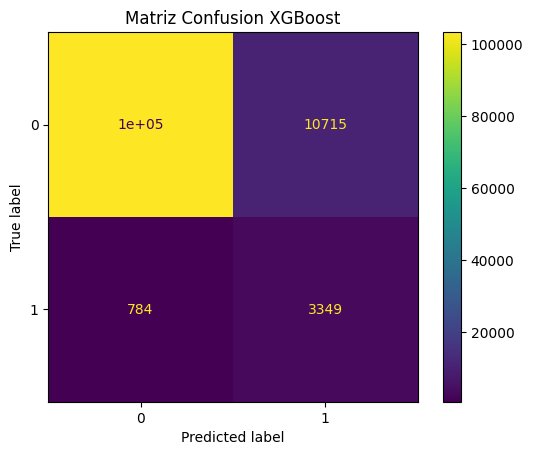

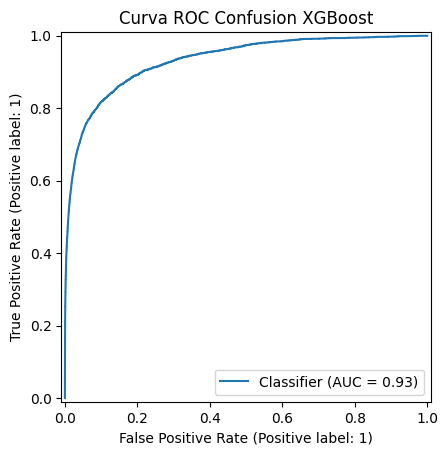

,modelo,precision,recall,f1,auc
0,KNN,0.847169,0.372853,0.517809,0.865627
1,Logistic Regression,0.095399,0.731430,0.168784,0.815279
2,Bayesian Classification,0.089574,0.088556,0.089062,0.666605
3,Decision Tree,0.137152,0.736995,0.231266,0.859555
4,Random Forest,0.318861,0.696588,0.437472,0.918166
5,XGBoost,0.238126,0.810307,0.368083,0.932998


In [80]:
# xgboost_metricas
modelo_xgb = joblib.load('drive/MyDrive/xgb.pkl')
pro_xgb = modelo_xgb.predict_proba(X_val)[:, 1]
pr_xgb = (pro_xgb >= 0.5).astype(int)
cm_xgb = confusion_matrix(y_val, pr_xgb)
ConfusionMatrixDisplay(cm_xgb).plot()
plt.title("Matriz Confusion XGBoost")
plt.show()

RocCurveDisplay.from_predictions(y_val, pro_xgb)
plt.title("Curva ROC Confusion XGBoost")
plt.show()
res = ['XGBoost', precision_score(y_val, pr_xgb), recall_score(y_val, pr_xgb), f1_score(y_val, pr_xgb), roc_auc_score(y_val, pro_xgb)]
resultados.loc[len(resultados)] = res

resultados


In [93]:
print(classification_report(y_val, pr_xgb))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95    113975
           1       0.24      0.81      0.37      4133

    accuracy                           0.90    118108
   macro avg       0.62      0.86      0.66    118108
weighted avg       0.97      0.90      0.93    118108



In [ ]:
# svm_entrenamiento
inicio = time.time()
pipe_svm = Pipeline([('scaler', StandardScaler()), ('modelo', SVC(probability=True, class_weight='balanced'))])
esp_svm = {'modelo__C': Real(1e-2, 10, prior='log-uniform'), 'modelo__gamma': Real(1e-4, 1, prior='log-uniform')}
bay_svm = BayesSearchCV(pipe_svm, esp_svm, scoring='roc_auc', n_jobs=-1, cv=cv, n_iter=5, random_state=42)
print('Entrenando SVM')
bay_svm.fit(X_train, y_train)
print('Mejor AUC validación:', bay_svm.best_score_)
print('Tiempo:', time.time() - inicio)
joblib.dump(bay_svm.best_estimator_, 'drive/MyDrive/svm.pkl')


Entrenando SVM


In [ ]:
# svm_metricas
modelo_svm = joblib.load('drive/MyDrive/svm.pkl')
pro_svm = modelo_svm.predict_proba(X_val)[:, 1]
pr_svm = (pro_svm >= 0.5).astype(int)
cm_svm = confusion_matrix(y_val, pr_svm)
ConfusionMatrixDisplay(cm_svm).plot(); plt.show()
RocCurveDisplay.from_predictions(y_val, pro_svm); plt.show()
res = ['SVM', precision_score(y_val, pr_svm), recall_score(y_val, pr_svm), f1_score(y_val, pr_svm), roc_auc_score(y_val, pro_svm)]
resultados.loc[len(resultados)] = res; print(resultados.tail(1))


In [83]:
# # mlp_entrenamiento
# inicio = time.time()
# pipe_mlp = Pipeline([('scaler', StandardScaler()), ('modelo', MLPClassifier(max_iter=100, early_stopping=True))])
# esp_mlp = {'modelo__hidden_layer_sizes': Integer(32, 256), 'modelo__alpha': Real(1e-5, 1e-2, prior='log-uniform')}
# bay_mlp = BayesSearchCV(pipe_mlp, esp_mlp, scoring='roc_auc', n_jobs=-1, cv=cv, n_iter=5, random_state=42)
# print('Entrenando MLP')
# bay_mlp.fit(X_train, y_train)
# print('Mejor AUC validación:', bay_mlp.best_score_)
# print('Tiempo:', time.time() - inicio)
# joblib.dump(bay_mlp.best_estimator_, 'drive/MyDrive/mlp.pkl')


Entrenando MLP

Mejor AUC validación: 0.8777342849361527

Tiempo: 408.32864904403687

['drive/MyDrive/mlp.pkl']

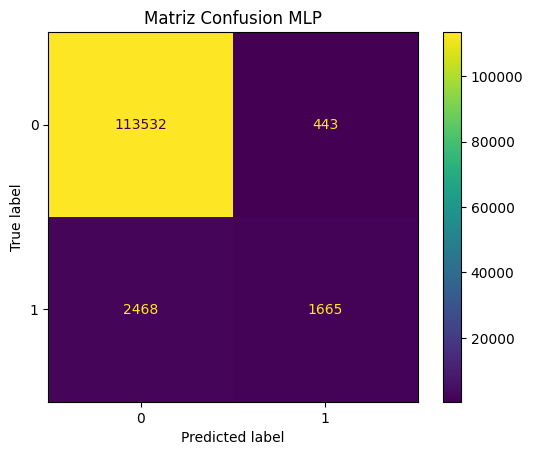

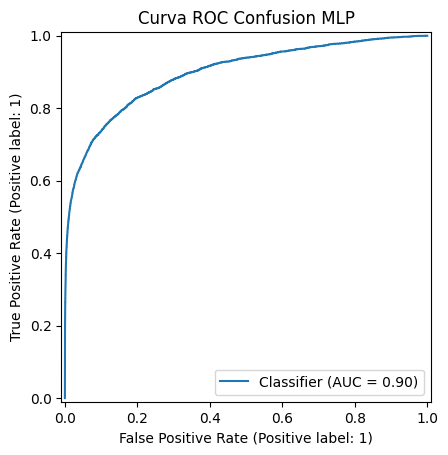

,modelo,precision,recall,f1,auc
0,KNN,0.847169,0.372853,0.517809,0.865627
1,Logistic Regression,0.095399,0.731430,0.168784,0.815279
2,Bayesian Classification,0.089574,0.088556,0.089062,0.666605
3,Decision Tree,0.137152,0.736995,0.231266,0.859555
4,Random Forest,0.318861,0.696588,0.437472,0.918166
5,XGBoost,0.238126,0.810307,0.368083,0.932998
6,MLP,0.789848,0.402855,0.533568,0.897257


In [84]:
# mlp_metricas
modelo_mlp = joblib.load('drive/MyDrive/mlp.pkl')
pro_mlp = modelo_mlp.predict_proba(X_val)[:, 1]
pr_mlp = (pro_mlp >= 0.5).astype(int)
cm_mlp = confusion_matrix(y_val, pr_mlp)
ConfusionMatrixDisplay(cm_mlp).plot()

plt.title("Matriz Confusion MLP")
plt.show()

RocCurveDisplay.from_predictions(y_val, pro_mlp)
plt.title("Curva ROC Confusion MLP")
plt.show()

res = ['MLP', precision_score(y_val, pr_mlp), recall_score(y_val, pr_mlp), f1_score(y_val, pr_mlp), roc_auc_score(y_val, pro_mlp)]

resultados.loc[len(resultados)] = res

resultados


In [94]:
print(classification_report(y_val, pr_mlp))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113975
           1       0.79      0.40      0.53      4133

    accuracy                           0.98    118108
   macro avg       0.88      0.70      0.76    118108
weighted avg       0.97      0.98      0.97    118108



In [85]:
# resumen_final

resultados.sort_values('auc', ascending=False, inplace=True)

resultados.reset_index(drop=True)


,modelo,precision,recall,f1,auc
0,XGBoost,0.238126,0.810307,0.368083,0.932998
1,Random Forest,0.318861,0.696588,0.437472,0.918166
2,MLP,0.789848,0.402855,0.533568,0.897257
3,KNN,0.847169,0.372853,0.517809,0.865627
4,Decision Tree,0.137152,0.736995,0.231266,0.859555
5,Logistic Regression,0.095399,0.731430,0.168784,0.815279
6,Bayesian Classification,0.089574,0.088556,0.089062,0.666605
